In [19]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

### Selecionando Colunas

In [20]:
colunas_microdados = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q024', 'Q025']

colunas_questionario = ['NU_INSCRICAO', 'TP_RESPOSTA', 'Q001', 'Q002', 'Q003',
       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
       'Q022', 'Q023', 'Q024', 'Q025A', 'Q025B', 'Q025C', 'Q025D', 'Q025E',
       'Q025F', 'Q026A', 'Q026B', 'Q026C', 'Q026D', 'Q026E', 'Q026F', 'Q026G',
       'Q026H', 'Q027', 'Q028A', 'Q028B', 'Q028C', 'Q028D', 'Q028E', 'Q028F',
       'Q028G', 'Q028H', 'Q028I', 'Q028J', 'Q028K', 'Q028L', 'Q028M', 'Q028N',
       'Q028O', 'Q028P','Q028Q', 'Q028R', 'Q029', 'Q030A', 'Q030B', 'Q030C',
       'Q030D', 'Q030E', 'Q030F', 'Q030G', 'Q031', 'Q032A', 'Q032B', 'Q032C',
       'Q032D', 'Q032E', 'Q032F', 'Q032G', 'Q033A', 'Q033B', 'Q033C', 'Q033D',
       'Q033E', 'Q033F', 'Q033G', 'Q033H', 'Q033I', 'Q033J']

### Importando Data e Reduzindo tamanho dos arquivos através da remoção de colunas

In [21]:
#import colunas selecionadas
df_microdados = pd.read_csv('DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1', nrows = 500000, usecols=colunas_microdados)
df_questionario = pd.read_csv('DADOS/QUEST_HAB_ESTUDO.csv', sep=';', encoding='ISO-8859-1', nrows = 500000, usecols=colunas_questionario)

In [22]:
df_microdados.to_csv('DADOS/microdados_reduzido.csv', sep=';', encoding='ISO-8859-1', index=False)
df_questionario.to_csv('DADOS/questionario_reduzido.csv', sep=';', encoding='ISO-8859-1', index=False)

In [23]:
print(f"Novo tamanho do dataset de microdados: {df_microdados.shape} e do dataset de questionário: {df_questionario.shape}")

Novo tamanho do dataset de microdados: (500000, 30) e do dataset de questionário: (500000, 76)


In [24]:
# Renomear valores
racas_dict = { 0: 'Não declarado', 1: 'Branca', 2: 'Preta',
            3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Sem informação'}
idades_dict = {   
    0: 'Menor de 17 anos', 1: '17 anos', 2: '18 anos', 3: '19 anos', 4: '20 anos',
    5: '21 anos', 6: '22 anos', 7:'23 anos', 8:'24 anos', 9:'25 anos',
    10: 'Entre 26 e 30 anos', 11:'Entre 31 e 35 anos', 12:'Entre 36 e 40 anos',
    13: 'Entre 41 e 45 anos', 14: 'Entre 46 e 50 anos', 15: 'Entre 51 e 55 anos',
    16: 'Entre 56 e 60 anos', 17: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 
    20: 'Maior de 70 anos'  
}

codigos_capitais = {
    "Rio Branco": 1200401,
    "Maceió": 2704302,
    "Macapá": 1600303,
    "Manaus": 1302603,
    "Salvador": 2927408,
    "Fortaleza": 2304400,
    "Brasília": 5300108,
    "Vitória": 3205309,
    "Goiânia": 5208707,
    "São Luís": 2111300,
    "Cuiabá": 5103403,
    "Campo Grande": 5002704,
    "Belo Horizonte": 3106200,
    "Belém": 1501402,
    "João Pessoa": 2507507,
    "Curitiba": 4106902,
    "Recife": 2611606,
    "Teresina": 2211001,
    "Rio de Janeiro": 3304557,
    "Natal": 2408102,
    "Porto Alegre": 4314902,
    "Porto Velho": 1100205,
    "Boa Vista": 1400100,
    "Florianópolis": 4205407,
    "São Paulo": 3550308,
    "Aracaju": 2800308,
    "Palmas": 1721000
}

replace_colunas_microdados = {"Q024": "Acesso a Computadores", "Q025": "Acesso a Internet"}
replace_dict_abdcde = {"A":'Não', "B":'Sim, 1', "C":"Sim, 2", "D":"Sim, 3", "E":"Sim, 4+"}
replace_dict_ab = {"A":'Não', "B":'Sim'}
dict_area = {'NU_NOTA_CN': "Nota de Ciências da Natureza", "NU_NOTA_CH": "Nota de Ciências Humanas", 'NU_NOTA_LC': "Nota de Linguagens e Códigos", 'NU_NOTA_MT':"Nota de Matemática", 'NU_NOTA_REDACAO': "Nota da Redação"}

In [25]:
df_microdados["Q024"] = df_microdados["Q024"].replace(replace_dict_abdcde)
df_microdados["Q025"] = df_microdados["Q025"].replace(replace_dict_ab)
df_microdados = df_microdados.rename(columns=replace_colunas_microdados)

replace_dict_questionario = {0: 'Não Respondeu', 1: 'Respondeu',2: 'Não Respondeu'}
df_questionario['TP_RESPOSTA'] = df_questionario['TP_RESPOSTA'].replace(replace_dict_questionario)

for i in range(0,18):
    df_microdados.loc[df_microdados['TP_FAIXA_ETARIA'] == i, 'TP_FAIXA_ETARIA'] = idades_dict[i]
for i in range(0, 7):
    df_microdados.loc[df_microdados['TP_COR_RACA'] == i, 'TP_COR_RACA'] = racas_dict[i]

### Avaliando quantos alunos fizeram as provas e o questionário

In [26]:
# Get lines where TP_PRESENCA_CH is 1 & TP_PRESENCA_CN is 1 & TP_PRESENCA_LC is 1 & TP_PRESENCA_MT is 1
data_presentes = df_microdados[(df_microdados['TP_PRESENCA_CH'] == 1) & (df_microdados['TP_PRESENCA_CN'] == 1) & (df_microdados['TP_PRESENCA_LC'] == 1) & (df_microdados['TP_PRESENCA_MT'] == 1)]
# Get lines where TP_PRESENCA_ch IS 0 OR TP_PRESENCA_CN IS 0 OR TP_PRESENCA_LC IS 0 OR TP_PRESENCA_MT IS 0
data_faltantes = df_microdados[(df_microdados['TP_PRESENCA_CH'] == 0) | (df_microdados['TP_PRESENCA_CN'] == 0) | (df_microdados['TP_PRESENCA_LC'] == 0) | (df_microdados['TP_PRESENCA_MT'] == 0)]

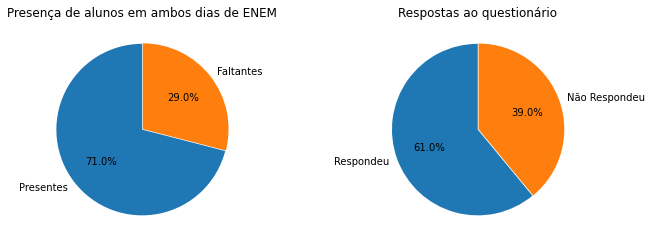

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
axes = axes.flatten()

axes[0].pie([data_presentes.shape[0], data_faltantes.shape[0]], explode=(0, 0.01), labels=['Presentes', 'Faltantes'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Presença de alunos em ambos dias de ENEM')
axes[1].pie(df_questionario['TP_RESPOSTA'].value_counts(), explode=(0, 0.01), labels=['Respondeu', 'Não Respondeu'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Respostas ao questionário')
plt.tight_layout()

### Mensurando Grupos de Raça e Idade que realizaram o ENEM

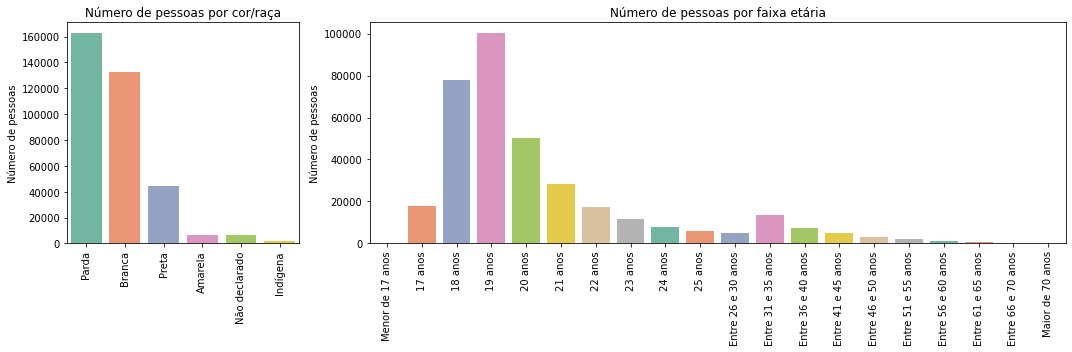

In [28]:
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Primeiro plot: Raça
sns.barplot(x=data_presentes['TP_COR_RACA'].value_counts().index, y=data_presentes['TP_COR_RACA'].value_counts(), ax=ax1, palette='Set2', width=0.8)
ax1.set_ylabel('Número de pessoas')
ax1.set_title('Número de pessoas por cor/raça')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('')

# Segundo plot: Faixa Etária
sns.barplot(x=data_presentes['TP_FAIXA_ETARIA'].value_counts().index, y=data_presentes['TP_FAIXA_ETARIA'].value_counts(), ax=ax2, palette='Set2', order=idades_dict.values())
ax2.set_ylabel('Número de pessoas')
plt.xlabel('Faixa Etária')
ax2.set_title('Número de pessoas por faixa etária')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_xlabel('')

plt.tight_layout();
plt.show()

### Comparando desempenho dos alunos por tipo de escola (pública e privada)

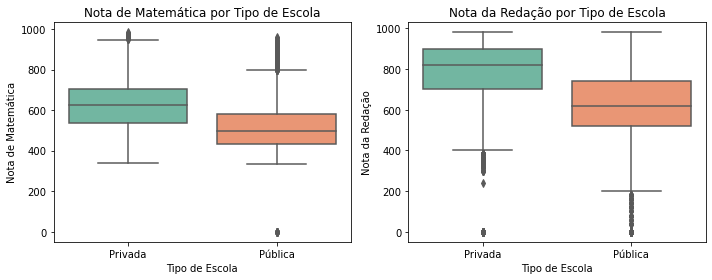

In [29]:
# Use .copy() para garantir que você tenha uma cópia independente do DataFrame original
data_presentes = data_presentes.copy()
data_presentes.loc[:, 'TIPO_ESCOLA'] = data_presentes['TP_ESCOLA'].map({2: 'Pública', 3: 'Privada'})
# create two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes = axes.flatten()

sns.boxplot(x='TIPO_ESCOLA', y='NU_NOTA_MT', data=data_presentes, ax=axes[0], palette='Set2')
axes[0].set_xlabel('Tipo de Escola')
axes[0].set_ylabel('Nota de Matemática')
axes[0].set_title('Nota de Matemática por Tipo de Escola')

sns.boxplot(x='TIPO_ESCOLA', y='NU_NOTA_REDACAO', data=data_presentes, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Tipo de Escola')
axes[1].set_ylabel('Nota da Redação')
axes[1].set_title('Nota da Redação por Tipo de Escola')

plt.tight_layout()
plt.show()

### Avaliando o impacto da disponibilidade de Computadores e Internet para os estudantes

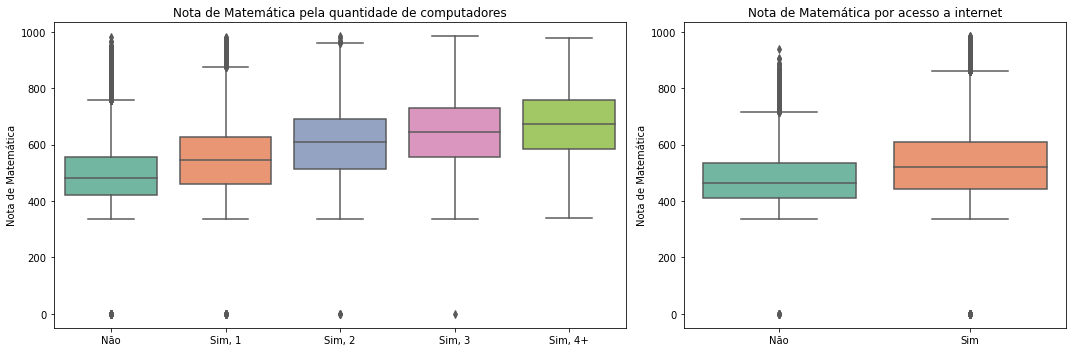

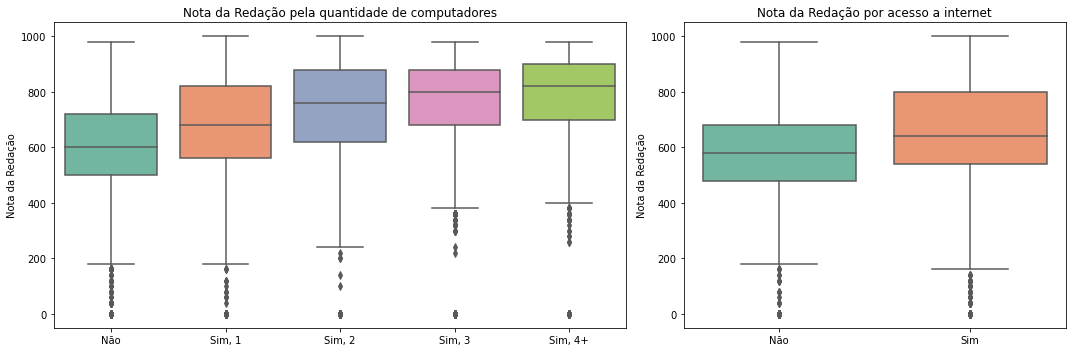

In [30]:
# Compare a nota de matemática e  de redação com o acesso a computadores e a internet
for materia in ['NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2])
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    sns.boxplot(x=data_presentes['Acesso a Computadores'], y=data_presentes[materia], ax=ax1, 
                order = ['Não', 'Sim, 1', "Sim, 2", "Sim, 3", "Sim, 4+"], palette='Set2')
    ax1.set_ylabel(dict_area[materia])
    ax1.set_title(f"{dict_area[materia]} pela quantidade de computadores")
    ax1.set_xlabel('')
    sns.boxplot(x=data_presentes['Acesso a Internet'], y=data_presentes[materia], ax=ax2, 
                order = ["Não", "Sim"], palette='Set2')
    ax2.set_ylabel(dict_area[materia])
    ax2.set_title(f"{dict_area[materia]} por acesso a internet")
    ax2.set_xlabel('')

    plt.tight_layout();
    plt.show()

### Filtrando Alunos de Interesse

Aqui iremos criar dois novos dataframes, um para representar os alunos que responderam o questionário e outro para representar os alunos que fizeram as provas e o questionário, através de um merge nos dois datasets de dados, através da coluna "NU_INSCRICAO" que é comum a ambos.

In [31]:
# Filtra linhas que os alunos responderam o questionário
qst_respondido = df_questionario[df_questionario['TP_RESPOSTA'] == 1]

In [32]:
# merge dataframes based on NU_INSCRICAO column
df_inscritos = pd.merge(data_presentes, qst_respondido, on='NU_INSCRICAO', how='inner')

### Avaliando métodos de estudo dos alunos durante a pandemia

### Avaliando dificuldades encontradas nos estudos durante a pandemia